In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/JoosKorstanje/datasets/main/sales_data.csv")
df.head()

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
0,282.0,3.0,0,1,1
1,223.0,3.0,0,1,1
2,285.0,3.0,1,1,1
3,250.0,3.0,0,1,1
4,271.0,2.0,1,1,1


In [3]:
df

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
0,282.0,3.0,0,1,1
1,223.0,3.0,0,1,1
2,285.0,3.0,1,1,1
3,250.0,3.0,0,1,1
4,271.0,2.0,1,1,1
...,...,...,...,...,...
995,171.0,2.0,0,0,0
996,101.0,2.0,1,1,0
997,260.0,3.0,0,0,0
998,208.0,3.0,0,1,0


In [4]:
df['buy'].value_counts()

0    950
1     50
Name: buy, dtype: int64

<AxesSubplot: title={'center': 'Class distribution'}, xlabel='buy'>

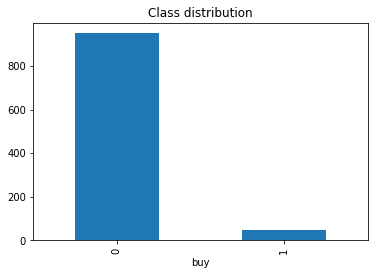

In [5]:
df.pivot_table(index='buy', aggfunc='size').plot(kind='bar',title='Class distribution')

#### You can see here that there are very few buyers compared to the other visitors.

### applying train test stratified Because our class is imbalanced

Stratified sampling is a sampling method that avoids disturbing class balance in your samples. It allows you to generate a 
train and a test set with the exact same class balance as in the original data.

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, stratify=df.buy)

<AxesSubplot: title={'center': 'Class distribution'}, xlabel='buy'>

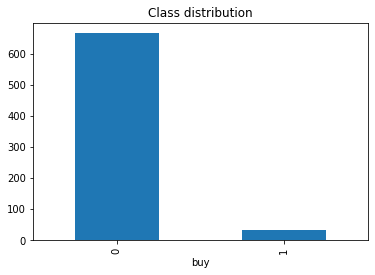

In [7]:
# we can see train test distribution in bar chart
train.pivot_table(index='buy', aggfunc='size').plot(kind='bar',title='Class distribution')

<AxesSubplot: title={'center': 'Class distribution'}, xlabel='buy'>

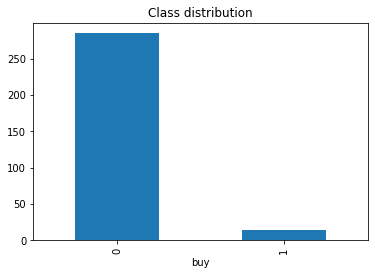

In [8]:
test.pivot_table(index='buy', aggfunc='size').plot(kind='bar',title='Class distribution')

## A baseline model

In [9]:
# this very bad model predicts that nobody ever buys anything
preds = [0] * len(test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(test.buy, preds)

0.95

accuracy of this baseline model is surprisingly very good, it predicts that nobody buys anything. Therefore, it is wrong only 
for the buyers(5% of the data set).

As a baseline model, we will create a very bad model that predicts that nobody buys anything. This comes down to generating a 
list of predictions that are all 0.

In [11]:
# now checking precision and recall

In [12]:
from sklearn.metrics import precision_score, recall_score
print('Precision is :',precision_score(test.buy, preds))
print('Recall is :',recall_score(test.buy, preds))

Precision is : 0.0
Recall is : 0.0


C:\Users\Aspire 5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision will tell you the percentage of correctly predicted buyers as a percentage of the total number of predicted buyers. 
In this very bad model, not a single person was identified as a buyer and the Precision is therefore 0

Recall, on the other hand, tells you the percentage of buyers that you have been able to find within all of the actual buyers. 
Since your model has not found a single buyer, Recall is also 0

In [13]:
## Let's see what the resulting F1 score is:

In [14]:
from sklearn.metrics import f1_score
print('F1 score is :', f1_score(test.buy, preds))

F1 score is : 0.0


The result is not surprising. As the F1 score is the harmonic mean of precision and recall, the F1 score is also 0.

#### This model in this example was not an intelligent model at all. Yet the example shows that it can be very dangerous to use accuracy as a metric on imbalanced data sets. This model is really not performant at all and a performance evaluation of 0 would be the only fair evaluation. Precision, recall, and the F1-score have all proven to be much better cases in this example.

In [15]:
# Let's use logistic Regression algorithm

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# fit the logistic regression on the independent variables of the train data with buy as dependent variable
log_reg.fit(train[['time_on_page','pages_viewed','interest_ski', 'interest_climb']], train['buy'])

# Make a prediction using our model on the test set

preds = log_reg.predict(test[['time_on_page','pages_viewed','interest_ski', 'interest_climb']])

In [17]:
# Let's see the confusion metrics
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test['buy'],preds).ravel()

print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  284 
False positives:  1 
False negatives:  10 
True positives:  5


In [18]:
# now check the accuracy score
print('Accuracy is: ',accuracy_score(test.buy, preds))

Accuracy is:  0.9633333333333334


In [19]:
# Let's see what precision and recall says
print('Precision is: ', precision_score(test.buy, preds))
print('Recall is: ', recall_score(test.buy, preds))

Precision is:  0.8333333333333334
Recall is:  0.3333333333333333


In [20]:
# Let's check f1 score
print('F1 Score is: ', f1_score(test.buy, preds))

F1 Score is:  0.47619047619047616


The F1 score has been shown as a model performance metric. The F1 score becomes especially valuable when working on 
classification models in which your data set is imbalanced.

You have seen that the F1 score combines precision and recall into a single metric. This makes it easy to use in grid search 
or automated optimization